 Анализ данных из Росстат
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
%pip install openpyxl


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
     ---- -------------------------------- 30.7/250.0 kB 187.9 kB/s eta 0:00:02
     ---- -------------------------------- 30.7/250.0 kB 187.9 kB/s eta 0:00:02
     ------ ------------------------------ 41.0/250.0 kB 140.9 kB/s eta 0:00:02
     --------- --------------------------- 61.4/250.0 kB 193.2 kB/s eta 0:00:01
     ------------ ------------------------ 81.9/250.0 kB 229.7 kB/s eta 0:00:01
     ------------- ----------------------- 92.2/250.0 kB 249.8 kB/s eta 0:00:01
     ----------------- ------------------ 122.9/250.0 kB 288.8 kB/s eta 0:00:01
     -------------------- --------------- 143.4/250.0 kB 304.6 kB/s eta 0:00:01
     ---------------------------- ------- 194.6/250.0 kB 368.6 kB

In [3]:
# загрузка данных
raw_df = pd.read_excel("data/sred_potreb_cen_1991-2022.xlsx", sheet_name=1, skiprows=2, decimal=',')
raw_df.head(10)

,ПОКАЗАТЕЛИ,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Средние потребительские цены на отдельные виды...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Говядина (кроме бескостного мяса),15.54,221.5,2201.27,5186.28,12547,14137,15787,30.04,42.01,...,244.55,272.28,314.94,315.02,320.34,330.58,350.05,361.04,416.46,484.17
2,Свинина (кроме бескостного мяса),14.38,260,2672.81,6579.38,15053,16810,19055,33.99,43.37,...,214.18,272.36,271.08,264.32,255.87,275.26,264.55,269.14,311.84,307.92
3,Куры охлажденные и мороженые1),13.57,194.76,2238.98,5677.09,11587,13815,16061,30.74,39.28,...,107.03,136.14,133.73,138.49,126.29,151.27,143.13,145.55,183.54,178.22
4,Колбаса вареная2),17,271,3351.3,8984.1,20016,22859,26767,43.81,61.56,...,302.94,310.54,344.81,351.27,360.88,382.98,399.37,406.84,450.57,480.16
5,Консервы мясные3),8.87,163.9,1165.48,2991.46,6692,7375,7811,15.5,18.16,...,79.33,94.42,117.04,121.37,125.21,130.13,139.47,153.5,167.04,580.06
6,Рыба мороженая неразделанная4),2.32,129.5,1088.73,3675.17,8325,9398,9912,18.93,23.83,...,90.79,110.65,138.16,147.68,153.03,152.14,170.13,181.08,192.61,207.56
7,"Рыба соленая, маринованная, копченая",5.72,272.6,2598.96,7495.95,17488,19912,21402,32.13,47.89,...,252.52,292.21,352.58,382.54,388.83,398.24,424.54,453.54,525.66,597.77
8,Консервы рыбные натуральные и с добавлением ма...,3.91,120,1040.71,3211.18,8050,8540,8468,13.85,19.96,...,60.50,70.12,91.94,103.94,109.09,113.71,119.69,135.03,156.01,534.69
9,Масло сливочное 6),12.24,413,2912.58,12984.99,20075,22968,23238,64.44,66.83,...,308.92,357.54,397.75,477.13,528.83,553.02,613.39,638.69,719.21,835.77


- Очистка


In [4]:
# удаление строк с пустыми значениями
raw_df = raw_df.dropna()
raw_df.head()


,ПОКАЗАТЕЛИ,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,Говядина (кроме бескостного мяса),15.54,221.5,2201.27,5186.28,12547,14137,15787,30.04,42.01,...,244.55,272.28,314.94,315.02,320.34,330.58,350.05,361.04,416.46,484.17
2,Свинина (кроме бескостного мяса),14.38,260,2672.81,6579.38,15053,16810,19055,33.99,43.37,...,214.18,272.36,271.08,264.32,255.87,275.26,264.55,269.14,311.84,307.92
3,Куры охлажденные и мороженые1),13.57,194.76,2238.98,5677.09,11587,13815,16061,30.74,39.28,...,107.03,136.14,133.73,138.49,126.29,151.27,143.13,145.55,183.54,178.22
4,Колбаса вареная2),17,271,3351.3,8984.1,20016,22859,26767,43.81,61.56,...,302.94,310.54,344.81,351.27,360.88,382.98,399.37,406.84,450.57,480.16
5,Консервы мясные3),8.87,163.9,1165.48,2991.46,6692,7375,7811,15.5,18.16,...,79.33,94.42,117.04,121.37,125.21,130.13,139.47,153.5,167.04,580.06


In [5]:
raw_df.shape

(86, 33)

In [6]:
raw_df.columns

Index([' ПОКАЗАТЕЛИ ',           1991,           1992,           1993,
                 1994,           1995,           1996,           1997,
                 1998,           1999,           2000,           2001,
                 2002,           2003,           2004,           2005,
                 2006,           2007,           2008,           2009,
                 2010,           2011,           2012,           2013,
                 2014,           2015,           2016,           2017,
                 2018,           2019,           2020,           2021,
                 2022],
      dtype='object')

In [7]:
# для удобства конвертируем значения ключей в строковой тип
raw_df.columns = raw_df.columns.astype('str')
raw_df.columns

Index([' ПОКАЗАТЕЛИ ', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [19]:
# транспонирование 
df_1 = raw_df.T
df_1.head()

,1,2,3,4,5,6,7,8,9,10,...,79,80,81,82,83,84,85,86,87,88
ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),Консервы мясные3),Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением ма...,Масло сливочное 6),"Масло подсолнечное7), за л",...,"Отопление, за Гкал","Газ сетевой, за месяц с человека",Электроэнергия в квартирах без электроплит за...,"Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день35)","Санаторий36), за день","Дом отдыха, пансионат37), за день",Первичный консультативный прием у врача-специа...,Общий анализ крови38)
1991,15.54,14.38,13.57,17,8.87,2.32,5.72,3.91,12.24,5.48,...,…,0.51,3.92,1.89,2.87,0.59,30.17,19.64,10.5,4.54
1992,221.5,260,194.76,271,163.9,129.5,272.6,120,413,190,...,…,3.4,35.1,23.82,18.92,17.34,618.53,360.03,122.61,48.02
1993,2201.27,2672.81,2238.98,3351.3,1165.48,1088.73,2598.96,1040.71,2912.58,1364.9,...,…,29,595,498,498,249,10304,6664,1614,777
1994,5186.28,6579.38,5677.09,8984.1,2991.46,3675.17,7495.95,3211.18,12984.99,5306.54,...,…,64.66,2682.71,1972.56,3186.69,955.52,35615.39,25380.81,7016.21,3470.18


In [20]:
# переименование ' ПОКАЗАТЕЛИ '
df_1 = df_1.rename(index={' ПОКАЗАТЕЛИ ': "годы"})
df_1.head()

,1,2,3,4,5,6,7,8,9,10,...,79,80,81,82,83,84,85,86,87,88
годы,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),Консервы мясные3),Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением ма...,Масло сливочное 6),"Масло подсолнечное7), за л",...,"Отопление, за Гкал","Газ сетевой, за месяц с человека",Электроэнергия в квартирах без электроплит за...,"Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день35)","Санаторий36), за день","Дом отдыха, пансионат37), за день",Первичный консультативный прием у врача-специа...,Общий анализ крови38)
1991,15.54,14.38,13.57,17,8.87,2.32,5.72,3.91,12.24,5.48,...,…,0.51,3.92,1.89,2.87,0.59,30.17,19.64,10.5,4.54
1992,221.5,260,194.76,271,163.9,129.5,272.6,120,413,190,...,…,3.4,35.1,23.82,18.92,17.34,618.53,360.03,122.61,48.02
1993,2201.27,2672.81,2238.98,3351.3,1165.48,1088.73,2598.96,1040.71,2912.58,1364.9,...,…,29,595,498,498,249,10304,6664,1614,777
1994,5186.28,6579.38,5677.09,8984.1,2991.46,3675.17,7495.95,3211.18,12984.99,5306.54,...,…,64.66,2682.71,1972.56,3186.69,955.52,35615.39,25380.81,7016.21,3470.18


In [22]:
# в кчестве ключей устанавливаем категории товаров и услуг
df_1.columns = df_1.loc["годы", :]
df_1.head()

годы,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),Консервы мясные3),Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением масла5),Масло сливочное 6),"Масло подсолнечное7), за л",...,"Отопление, за Гкал","Газ сетевой, за месяц с человека","Электроэнергия в квартирах без электроплит за минимальный объем потребления34), за 100 кВт·ч","Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день35)","Санаторий36), за день","Дом отдыха, пансионат37), за день",Первичный консультативный прием у врача-специалиста,Общий анализ крови38)
годы,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),Консервы мясные3),Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением ма...,Масло сливочное 6),"Масло подсолнечное7), за л",...,"Отопление, за Гкал","Газ сетевой, за месяц с человека",Электроэнергия в квартирах без электроплит за...,"Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день35)","Санаторий36), за день","Дом отдыха, пансионат37), за день",Первичный консультативный прием у врача-специа...,Общий анализ крови38)
1991,15.54,14.38,13.57,17,8.87,2.32,5.72,3.91,12.24,5.48,...,…,0.51,3.92,1.89,2.87,0.59,30.17,19.64,10.5,4.54
1992,221.5,260,194.76,271,163.9,129.5,272.6,120,413,190,...,…,3.4,35.1,23.82,18.92,17.34,618.53,360.03,122.61,48.02
1993,2201.27,2672.81,2238.98,3351.3,1165.48,1088.73,2598.96,1040.71,2912.58,1364.9,...,…,29,595,498,498,249,10304,6664,1614,777
1994,5186.28,6579.38,5677.09,8984.1,2991.46,3675.17,7495.95,3211.18,12984.99,5306.54,...,…,64.66,2682.71,1972.56,3186.69,955.52,35615.39,25380.81,7016.21,3470.18


In [23]:
# удаление лишней строки
df_1 = df_1.drop("годы")
df_1.head()

годы,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),Консервы мясные3),Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением масла5),Масло сливочное 6),"Масло подсолнечное7), за л",...,"Отопление, за Гкал","Газ сетевой, за месяц с человека","Электроэнергия в квартирах без электроплит за минимальный объем потребления34), за 100 кВт·ч","Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день35)","Санаторий36), за день","Дом отдыха, пансионат37), за день",Первичный консультативный прием у врача-специалиста,Общий анализ крови38)
1991,15.54,14.38,13.57,17,8.87,2.32,5.72,3.91,12.24,5.48,...,…,0.51,3.92,1.89,2.87,0.59,30.17,19.64,10.5,4.54
1992,221.5,260,194.76,271,163.9,129.5,272.6,120,413,190,...,…,3.4,35.1,23.82,18.92,17.34,618.53,360.03,122.61,48.02
1993,2201.27,2672.81,2238.98,3351.3,1165.48,1088.73,2598.96,1040.71,2912.58,1364.9,...,…,29,595,498,498,249,10304,6664,1614,777
1994,5186.28,6579.38,5677.09,8984.1,2991.46,3675.17,7495.95,3211.18,12984.99,5306.54,...,…,64.66,2682.71,1972.56,3186.69,955.52,35615.39,25380.81,7016.21,3470.18
1995,12547,15053,11587,20016,6692,8325,17488,8050,20075,10460,...,…,951,8077,3886,6185,2638,90428,60847,20704,10471


In [24]:
df_1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 1991 to 2022
Data columns (total 86 columns):
 #   Column                                                                                            Non-Null Count  Dtype 
---  ------                                                                                            --------------  ----- 
 0   Говядина (кроме бескостного мяса)                                                                 32 non-null     object
 1   Свинина (кроме бескостного мяса)                                                                  32 non-null     object
 2   Куры охлажденные и мороженые1)                                                                    32 non-null     object
 3   Колбаса вареная2)                                                                                 32 non-null     object
 4   Консервы мясные3)                                                                                 32 non-null     object
 5   Рыба морож

In [25]:
df_1.columns

Index(['Говядина (кроме бескостного мяса)', 'Свинина (кроме бескостного мяса)',
       'Куры охлажденные и мороженые1)', 'Колбаса вареная2)',
       'Консервы мясные3)', 'Рыба мороженая неразделанная4)',
       'Рыба соленая, маринованная, копченая ',
       'Консервы рыбные натуральные и с добавлением масла5)',
       'Масло сливочное 6) ', 'Масло подсолнечное7), за л',
       'Молоко питьевое цельное  пастеризованное 2,5-3,2% жирности8), за л',
       'Сыры сычужные твердые и мягкие', 'Яйца куриные, за 10 шт.',
       'Сахар-песок', 'Чай черный байховый', 'Мука пшеничная',
       'Хлеб и булочные изделия из пшеничной муки различных сортов9)',
       'Рис шлифованный',
       'Макаронные изделия из пшеничной муки высшего сорта10)', 'Картофель',
       'Капуста белокочанная свежая', 'Лук репчатый', 'Яблоки',
       'Водка крепостью 40% об.спирта и выше11), за л',
       'Коньяк ординарный отечественный12), за  л',
       'Вино игристое отечественное13), за  л', 'Пиво14), за л',
       

In [27]:
# удаление лишних символов пробела перед и после название ключей
df_1.columns = df_1.columns.str.strip(" ")
df_1.columns

Index(['Говядина (кроме бескостного мяса)', 'Свинина (кроме бескостного мяса)',
       'Куры охлажденные и мороженые1)', 'Колбаса вареная2)',
       'Консервы мясные3)', 'Рыба мороженая неразделанная4)',
       'Рыба соленая, маринованная, копченая',
       'Консервы рыбные натуральные и с добавлением масла5)',
       'Масло сливочное 6)', 'Масло подсолнечное7), за л',
       'Молоко питьевое цельное  пастеризованное 2,5-3,2% жирности8), за л',
       'Сыры сычужные твердые и мягкие', 'Яйца куриные, за 10 шт.',
       'Сахар-песок', 'Чай черный байховый', 'Мука пшеничная',
       'Хлеб и булочные изделия из пшеничной муки различных сортов9)',
       'Рис шлифованный',
       'Макаронные изделия из пшеничной муки высшего сорта10)', 'Картофель',
       'Капуста белокочанная свежая', 'Лук репчатый', 'Яблоки',
       'Водка крепостью 40% об.спирта и выше11), за л',
       'Коньяк ординарный отечественный12), за  л',
       'Вино игристое отечественное13), за  л', 'Пиво14), за л',
       'П

In [30]:
# df_1['Говядина (кроме бескостного мяса)'].unique()
df_1['Горячее водоснабжение, за м3'].unique()

array(['…', 60.7, 71.1, 77.42, 92.18, 103.0, 109.85, 121.66, 128.67,
       135.7, 143.96, 151.33, 156.81, 161.94, 185.8], dtype=object)

In [32]:
# замена '…' на 0
df_1 = df_1.replace('…', 0)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 1991 to 2022
Data columns (total 86 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   Говядина (кроме бескостного мяса)                                                                 32 non-null     float64
 1   Свинина (кроме бескостного мяса)                                                                  32 non-null     float64
 2   Куры охлажденные и мороженые1)                                                                    32 non-null     float64
 3   Колбаса вареная2)                                                                                 32 non-null     float64
 4   Консервы мясные3)                                                                                 32 non-null     float64
 5   Рыб

In [33]:
df_1['Еврошифер20), за 10 м2'].unique()

array([0, '...', 31986.77, 99732, 118529, 126831, 139.32, 213.93, 269.5,
       335.63, 398.32, 460.27, 508.15, 646.24, 734.86, 913.71, 1142.04,
       1144.83, 1154.66, 1232.19, 1289.04, 1368.75, 1425.95, 1494.21,
       1535.18, 2717.7, 2752.78, 2949.49, 3109.3, 4151.1, 4460.36],
      dtype=object)

In [34]:
df_1 = df_1.replace('...', 0)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 1991 to 2022
Data columns (total 86 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   Говядина (кроме бескостного мяса)                                                                 32 non-null     float64
 1   Свинина (кроме бескостного мяса)                                                                  32 non-null     float64
 2   Куры охлажденные и мороженые1)                                                                    32 non-null     float64
 3   Колбаса вареная2)                                                                                 32 non-null     float64
 4   Консервы мясные3)                                                                                 32 non-null     float64
 5   Рыб

In [35]:
df_1['Постановка набоек, за пару'].unique()

array([4.75, 92.17, 1683, 5498.27, 11532, 15024, 17168, 21.15, 28.7,
       36.42, 45.1, 56.28, 66.96, 79.6, 93.12, 105.53, 121.67, 145.52,
       166.34, '180.16', 212.25, 228.73, 241.94, 260.75, 290.62, 318.79,
       325.66, 330.22, 342.9, 351.59, 390.92, 408.82], dtype=object)

In [36]:
# конвертация данных по всей таблице
df_1 = df_1.astype("float")
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 1991 to 2022
Data columns (total 86 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   Говядина (кроме бескостного мяса)                                                                 32 non-null     float64
 1   Свинина (кроме бескостного мяса)                                                                  32 non-null     float64
 2   Куры охлажденные и мороженые1)                                                                    32 non-null     float64
 3   Колбаса вареная2)                                                                                 32 non-null     float64
 4   Консервы мясные3)                                                                                 32 non-null     float64
 5   Рыб

In [37]:
# сохранение в виде эксель
df_1.to_excel("data/my_rosstat.xlsx")

- Анализ

In [38]:
df_1["Общий анализ крови38)"]

1991        4.54
1992       48.02
1993      777.00
1994     3470.18
1995    10471.00
1996    13922.00
1997    19491.00
1998       24.40
1999       31.22
2000       37.99
2001       46.89
2002       59.21
2003       66.94
2004       77.96
2005       94.60
2006      110.21
2007      128.21
2008      148.32
2009      174.11
2010      195.11
2011      217.70
2012      242.25
2013      277.24
2014      306.95
2015      334.21
2016      354.91
2017      370.24
2018      382.06
2019      398.49
2020      398.71
2021      468.35
2022      455.43
Name: Общий анализ крови38), dtype: float64

In [39]:
# срез датафрейма
df_2 = df_1.loc["1998" :, :]
df_2.head()

годы,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),Консервы мясные3),Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением масла5),Масло сливочное 6),"Масло подсолнечное7), за л",...,"Отопление, за Гкал","Газ сетевой, за месяц с человека","Электроэнергия в квартирах без электроплит за минимальный объем потребления34), за 100 кВт·ч","Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день35)","Санаторий36), за день","Дом отдыха, пансионат37), за день",Первичный консультативный прием у врача-специалиста,Общий анализ крови38)
1998,30.04,33.99,30.74,43.81,15.50,18.93,32.13,13.85,64.44,23.43,...,0.0,3.18,17.09,7.36,17.32,5.12,201.84,135.41,41.90,24.40
1999,42.01,43.37,39.28,61.56,18.16,23.83,47.89,19.96,66.83,25.74,...,0.0,4.31,25.40,13.09,25.12,7.90,264.25,197.90,52.67,31.22
2000,52.72,58.45,48.80,77.97,19.52,29.54,61.22,21.15,69.12,23.20,...,0.0,5.66,39.16,23.11,33.60,9.19,351.35,279.76,62.97,37.99
2001,70.33,79.22,56.92,96.01,24.07,36.57,75.98,25.08,71.73,33.07,...,0.0,6.89,52.31,34.39,45.08,11.57,444.06,352.04,76.60,46.89
2002,72.56,80.98,58.38,101.57,26.55,40.39,87.99,25.11,80.08,35.76,...,0.0,9.47,70.85,48.66,61.77,15.50,551.39,426.89,99.77,59.21


In [42]:
# минимальная цена
df_2['Хлеб и булочные изделия из пшеничной муки различных сортов9)'].min()


6.42

In [44]:
# максимальная цена
df_2['Хлеб и булочные изделия из пшеничной муки различных сортов9)'].max()


92.67

In [46]:
# сколько раз изменилась среднея цена за весь период
product = 'Хлеб и булочные изделия из пшеничной муки различных сортов9)'

df_2.loc["2022", product] / df_2.loc["1998", product]

13.27258566978193

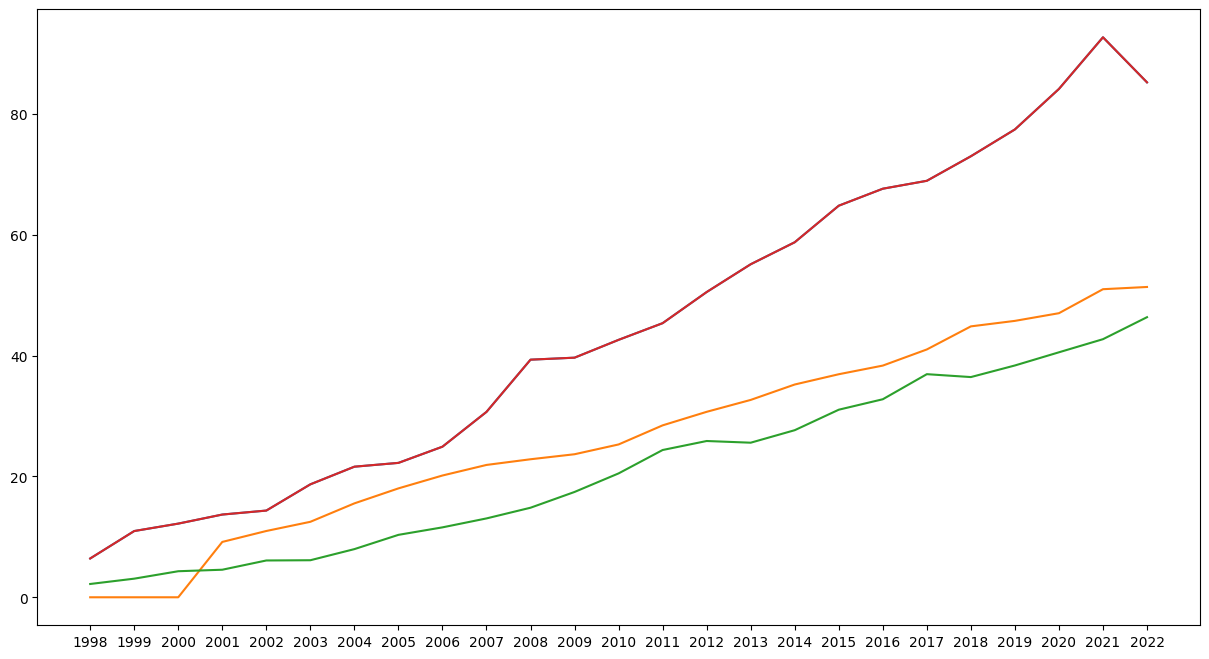

In [49]:
# визуализация данных
plt.figure(figsize=(15,8))
plt.plot(df_2.index, df_2['Хлеб и булочные изделия из пшеничной муки различных сортов9)'])
plt.plot(df_2.index, df_2['Бензин автомобильный марки АИ-95, за л'])
plt.plot(df_2.index, df_2['Проезд в метро, за поездку'])
plt.plot(df_2.index, df_2['Хлеб и булочные изделия из пшеничной муки различных сортов9)'])
plt.show()

In [40]:
df_2.columns

Index(['Говядина (кроме бескостного мяса)', 'Свинина (кроме бескостного мяса)',
       'Куры охлажденные и мороженые1)', 'Колбаса вареная2)',
       'Консервы мясные3)', 'Рыба мороженая неразделанная4)',
       'Рыба соленая, маринованная, копченая',
       'Консервы рыбные натуральные и с добавлением масла5)',
       'Масло сливочное 6)', 'Масло подсолнечное7), за л',
       'Молоко питьевое цельное  пастеризованное 2,5-3,2% жирности8), за л',
       'Сыры сычужные твердые и мягкие', 'Яйца куриные, за 10 шт.',
       'Сахар-песок', 'Чай черный байховый', 'Мука пшеничная',
       'Хлеб и булочные изделия из пшеничной муки различных сортов9)',
       'Рис шлифованный',
       'Макаронные изделия из пшеничной муки высшего сорта10)', 'Картофель',
       'Капуста белокочанная свежая', 'Лук репчатый', 'Яблоки',
       'Водка крепостью 40% об.спирта и выше11), за л',
       'Коньяк ординарный отечественный12), за  л',
       'Вино игристое отечественное13), за  л', 'Пиво14), за л',
       'П